In [1]:
from utils.utils import *
import torch

/opt/venv/lib/python3.10/site-packages/xformers/ops/fmha/flash.py:211: FutureWarning: `torch.library.impl_abstract` was renamed to `torch.library.register_fake`. Please use that instead; we will remove `torch.library.impl_abstract` in a future version of PyTorch.
  @torch.library.impl_abstract("xformers_flash::flash_fwd")
/opt/venv/lib/python3.10/site-packages/xformers/ops/fmha/flash.py:344: FutureWarning: `torch.library.impl_abstract` was renamed to `torch.library.register_fake`. Please use that instead; we will remove `torch.library.impl_abstract` in a future version of PyTorch.
  @torch.library.impl_abstract("xformers_flash::flash_bwd")
/opt/venv/lib/python3.10/site-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: '/opt/venv/lib/python3.10/site-packages/torchvision/image.so: undefined symbol: _ZN5torch3jit17parseSchemaOrNameERKNSt7__cxx1112basic_stringIcSt11char_traitsIcESaIcEEE'If you don't plan on using image functionality from `torchvision.

In [2]:
esd_path = 'models/esd-vangogh_from_vangogh-xattn_1-epochs_200.pt'
train_method = 'xattn' ## REMEMBER: please use the same train_method you used for training (it is present in the saved name)

diffuser = StableDiffuser(scheduler='DDIM').to('cuda')

finetuner = FineTunedModel(diffuser, train_method=train_method)
finetuner.load_state_dict(torch.load(esd_path))

/opt/venv/lib/python3.10/site-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(
/opt/venv/lib/python3.10/site-packages/transformers/models/clip/feature_extraction_clip.py:28: FutureWarning: The class CLIPFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use CLIPImageProcessor instead.
  warnings.warn(


unet.down_blocks.0.attentions.0.transformer_blocks.0.attn2.to_q
unet.down_blocks.0.attentions.0.transformer_blocks.0.attn2.to_k
unet.down_blocks.0.attentions.0.transformer_blocks.0.attn2.to_v
unet.down_blocks.0.attentions.0.transformer_blocks.0.attn2.to_out.0
unet.down_blocks.0.attentions.1.transformer_blocks.0.attn2.to_q
unet.down_blocks.0.attentions.1.transformer_blocks.0.attn2.to_k
unet.down_blocks.0.attentions.1.transformer_blocks.0.attn2.to_v
unet.down_blocks.0.attentions.1.transformer_blocks.0.attn2.to_out.0
unet.down_blocks.1.attentions.0.transformer_blocks.0.attn2.to_q
unet.down_blocks.1.attentions.0.transformer_blocks.0.attn2.to_k
unet.down_blocks.1.attentions.0.transformer_blocks.0.attn2.to_v
unet.down_blocks.1.attentions.0.transformer_blocks.0.attn2.to_out.0
unet.down_blocks.1.attentions.1.transformer_blocks.0.attn2.to_q
unet.down_blocks.1.attentions.1.transformer_blocks.0.attn2.to_k
unet.down_blocks.1.attentions.1.transformer_blocks.0.attn2.to_v
unet.down_blocks.1.attention

/tmp/ipykernel_3877/1687350669.py:7: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  finetuner.load_state_dict(torch.load(esd_path))


## Original Model

/sensei-fs/users/rgandikota/erasing/utils/utils.py:150: FutureWarning: Accessing config attribute `in_channels` directly via 'UNet2DConditionModel' object attribute is deprecated. Please access 'in_channels' over 'UNet2DConditionModel's config object instead, e.g. 'unet.config.in_channels'.
  (batch_size, self.unet.in_channels, img_size // 8, img_size // 8),


  0%|          | 0/50 [00:00<?, ?it/s]

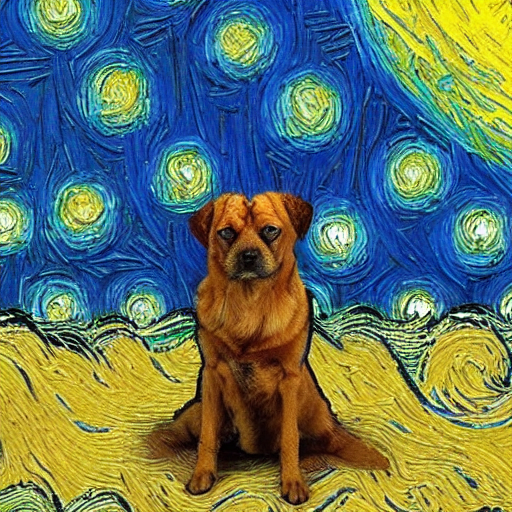

In [3]:
seed = 1234
images = diffuser("image of a dog in the style of Van Gogh",
         img_size=512,
         n_steps=50,
         n_imgs=1,
         generator=torch.Generator().manual_seed(seed),
         guidance_scale=7.5
         )[0][0]
images

## Erased Model

  0%|          | 0/50 [00:00<?, ?it/s]

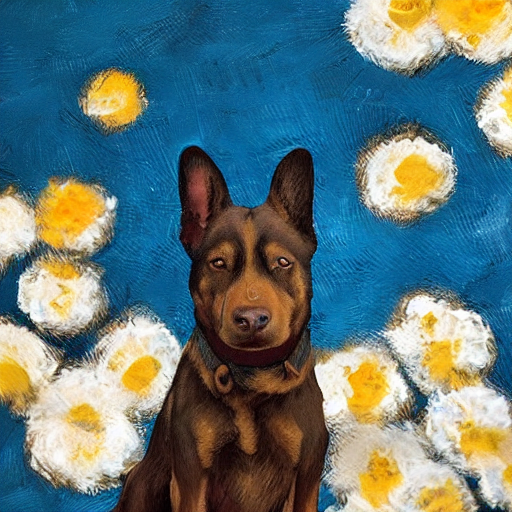

In [4]:
with finetuner:
    images = diffuser("image of a dog in the style of Van Gogh",
             img_size=512,
             n_steps=50,
             n_imgs=1,
             generator=torch.Generator().manual_seed(seed),
             guidance_scale=7.5
             )[0][0]
images